<a href="https://colab.research.google.com/github/Nmloury/DSI-Capstone/blob/master/projects/dl-for-coders/02_dog_breeds_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#|default_exp foo

In [45]:
# Install gradio
!pip install -Uqq gradio
!pip install -Uqq nbdev

In [46]:
#|export
# Imports
from fastai.vision.all import *
import gradio as gr

In [47]:
# Define Path
path = Path()
path_dl = path/'drive'/'MyDrive'/'Data Science'/'Deep Learning For Coders'

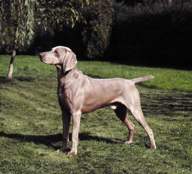

In [48]:
# Grab Image
im = PILImage.create(path_dl/'Data'/'weimaraner.jpeg')
im.thumbnail((192,192))
im

In [49]:
#|export
# Load Model
learn = load_learner(path_dl / 'Models' / 'dog_breeds_model.pkl')

In [50]:
# run inference on image
learn.predict(im)

('weimaraner',
 tensor(4),
 tensor([2.6288e-07, 2.6868e-06, 4.0089e-07, 3.4328e-07, 1.0000e+00]))

In [51]:
#|export
# Create function for Gradio
def classify_dog_breeds(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(learn.dls.vocab, map(float, probs)))

In [52]:
# Test Function on image
classify_dog_breeds(im)

{'cattle dog': 2.628764548262552e-07,
 'golden retriever': 2.6868406166613568e-06,
 'pitbull': 4.0089224739858764e-07,
 'pug': 3.4328314768572454e-07,
 'weimaraner': 0.9999963045120239}

In [53]:
#|export
# Create a Gradio Interface
image = gr.Image()
label = gr.Label()
example = [x for x in (path_dl/'Data').ls()]

# Launch Gradio Interface
intf = gr.Interface(fn=classify_dog_breeds, inputs=image, outputs=label, examples=example)
intf.launch(inline=False)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e7539e1f2e9dbad5d8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [54]:
from nbdev.export import nb_export
nbdev.export.nb_export(path/'drive'/'MyDrive'/'Colab Notebooks'/'02_dog_breeds_gradio.ipynb', '.')